# Escopo do problema

Em uma determinada dieta, o individuo deve ingerir a cada prato/refeição 30% de proteina, 15% de lipideos e 55% de carboidratos.

As opções de alimento são (cada 100g)
- **Peito de frango:** 23g proteína; 5g de lipídeos; 5g de carboidrato
- **Batata docê:** 2g de proteina;  0g de lipídeos; 24g de carboidrato
- **Arroz integral:**  2.6g de proteina; 1g de lipídeos; 26g de carboidrato
- **Ovo:**  13g de proteína, 8.9g de lipídeos; 1.5g de carboidratos
- **Feijão:** 9.5g de proteina; 1.4g de gordura; 29g de carboidratos


## Função objetiva

    Soma de carb: Diferença em relação a 55
    Soma de prot: Diferença em relação a 30
    Soma de lipi: Diferença em relação a 15

    soma das três diferenças: Objetivo é chegar em zero


In [55]:
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt

F = 0.8
CR = 0.3

def gera_prato():
    alimentos = []
    for i in range(5):
        quant = random.randint(0, 199) + random.random()
        alimentos.append(quant)
    return alimentos

In [2]:
gera_prato()

[105.56647273979713,
 122.37969752787228,
 58.83179825535954,
 31.91577225643081,
 187.3369154013639]

In [3]:
def populacao(num):
    pop = []
    for i in range(num):
        pop.append(gera_prato())
    return pop

In [4]:
populacao(5)

[[173.14407109642025,
  149.22732887366638,
  181.7526541044964,
  37.49458537046244,
  20.460384156641027],
 [94.71400112920092,
  141.84580391179455,
  48.02456072833912,
  96.04590234205911,
  192.97905990632788],
 [85.95330510763746,
  112.53640918824483,
  158.17249691153953,
  92.7706917140278,
  46.840687850504885],
 [142.1899134749819,
  94.54009798008173,
  49.12823168943735,
  44.45163950545118,
  189.20318595811548],
 [22.64531379372522,
  195.2537225594868,
  111.87344715128876,
  122.80571833849396,
  170.65785001053686]]

In [5]:
def divergencia(prato):
    carboidratos = prato[0] * .05 + prato[1] * .24 + prato[2] * .26  + prato[3] * .015 + prato[4] * .29
    proteinas    = prato[0] * .23 + prato[1] * .02 + prato[2] * .026 + prato[3] * .013 + prato[4] * .095
    lipidios     = prato[0] * .05 + prato[1] * .00 + prato[2] * .01  + prato[3] * .089 + prato[4] * .014

    total = carboidratos + proteinas + lipidios

    porc_carb = (carboidratos/total)*100
    porc_prot = (proteinas/total)*100
    porc_lip = (lipidios/total)*100

    dif_carb = abs(porc_carb - 55)
    dif_prot = abs(porc_prot - 30)
    dif_lip = abs(porc_lip - 15)

    dif_total = dif_carb + dif_prot + dif_lip

    return dif_total

In [8]:
x = gera_prato()
print(divergencia(x))

22.768153457245617


In [9]:
def seleciona3(parental, populacao):
    p2 = []
    tres_vetores = []
    for v in populacao:
        if parental != v:
            p2.append(v)
    for j in range(3):
        aleatorio = random.choice(p2)
        tres_vetores.append(aleatorio)
        p2.remove(aleatorio)
    return tres_vetores

In [50]:
def mutacao(vetor_parental, tres):
    cont = 0
    A, B, C = tres
    tentativa = []

    while cont < len(vetor_parental):
        R = random.random()
        if R < CR:
            X = A[cont] + F*abs(B[cont]-C[cont])
            tentativa.append(X)
        else:
            tentativa.append(vetor_parental[cont])
        cont += 1
    return tentativa

In [49]:
pop = [[1,2,3],[4,4,4],[5,2,1],[0,0,0],[7,8,9]]
parental = pop[0]
m = mutacao(parental, seleciona3(parental, pop))

print(parental)
print(m)
print(pop)

[5, 2, 1] [4, 4, 4] [0, 0, 0]
[1, 2, 3]
[1, 2, 3]
[[1, 2, 3], [4, 4, 4], [5, 2, 1], [0, 0, 0], [7, 8, 9]]


In [51]:
def melhor_vetor(pop):
    notas = []
    for i in pop:
        notas.append(divergencia(i))
    indice = notas.index(min(notas))
    return pop[indice]

Melhor vetor: [125.65114801142312, 126.06992988386996, 17.191030150096783, 168.76610120194275, 176.72190854905395]
Valor de fitness: 1.7875527411762882

Melhor vetor: [125.65114801142312, 126.06992988386996, 17.191030150096783, 168.76610120194275, 176.72190854905395]
Valor de fitness: 1.7875527411762882

Melhor vetor: [125.65114801142312, 126.06992988386996, 17.191030150096783, 168.76610120194275, 176.72190854905395]
Valor de fitness: 1.7875527411762882

Melhor vetor: [126.66175181472339, 45.32455847899952, 94.45582095601806, 196.71927912880486, 181.43018470441535]
Valor de fitness: 0.9005808533009585

Melhor vetor: [126.66175181472339, 45.32455847899952, 94.45582095601806, 196.71927912880486, 181.43018470441535]
Valor de fitness: 0.9005808533009585

Melhor vetor: [126.66175181472339, 45.32455847899952, 94.45582095601806, 196.71927912880486, 181.43018470441535]
Valor de fitness: 0.9005808533009585

Melhor vetor: [126.66175181472339, 45.32455847899952, 94.45582095601806, 196.71927912880

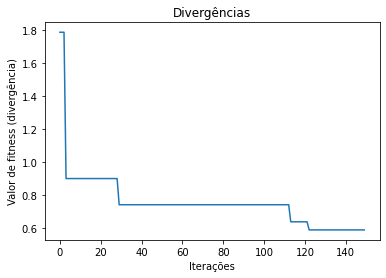

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

In [56]:
population = populacao(5)
melhores = []

for i in range(150):
    for j in population:
        tres = seleciona3(j, population)
        trial = mutacao(j, tres)
        if divergencia(trial) < divergencia(j):
            population.remove(j)
            population.append(trial)
    print(f'Melhor vetor: {melhor_vetor(population)}')
    print(f'Valor de fitness: {divergencia(melhor_vetor(population))}')
    melhores.append(divergencia((melhor_vetor(population))))
    print()

plt.plot(melhores)
plt.title('Divergências')
plt.xlabel('Iterações')
plt.ylabel('Valor de fitness (divergência)')
plt.show()
plt.title
